<a href="https://colab.research.google.com/github/akashpambhar21/CE005_ML_AkashPambhar/blob/main/Ml_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

DATASET_NUMBER = 1

if DATASET_NUMBER == 1:
  dataset = pd.read_csv('Dataset1.csv')

elif DATASET_NUMBER == 2:
  dataset = pd.read_csv('Dataset2.csv')

#seprate input and outout
inputColumn = dataset.iloc[:,:-1].values
outputColumn = dataset.iloc[:,-1].values

no_of_features = len(np.unique(outputColumn))
no_of_samples = len(inputColumn)

print(no_of_samples)
print(no_of_features)

14
2


In [ ]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=no_of_samples, centers=3, n_features=no_of_features,
cluster_std=0.2, random_state=0)

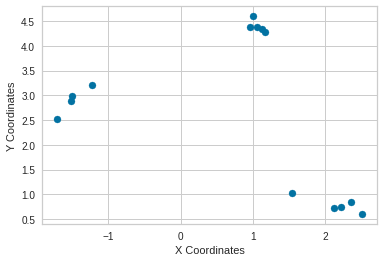

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:, 0], X[:, -1])
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [ ]:
kmeans.cluster_centers_

array([[ 2.15080143,  0.79357702],
       [-1.48461904,  2.90185931],
       [ 1.06410264,  4.39054189]])

In [ ]:
kmeans.labels_

array([2, 1, 0, 2, 0, 2, 1, 1, 0, 2, 1, 0, 0, 2], dtype=int32)

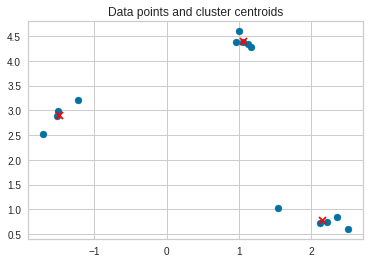

In [ ]:
plt.scatter(X[:, 0], X[:, -1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],c='red', marker='x')
plt.title('Data points and cluster centroids')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X, kmeans.labels_))

0.8868563998712445


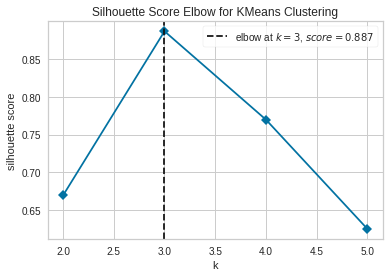

In [ ]:
# Import the KElbowVisualizer method
from yellowbrick.cluster import KElbowVisualizer
# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)
# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette',timings=False)
# Fit the data and visualize
visualizer.fit(X)
visualizer.poof()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


array([1], dtype=int32)

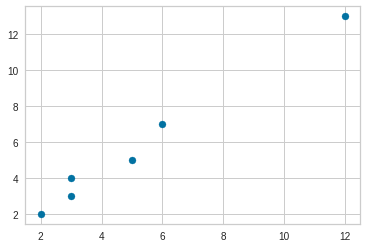

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
#x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
X1 = np.array([[2,2],[3,4],[6,7],[5,5],[3,3],[12,13]])
#X1.shape()
X2 = np.array([2,3,4])
plt.scatter(X1[:,0], X1[:,1])
centroid = np.array([[2,2],[3,4],[6,7]])
kmeans = KMeans(n_clusters=3, init=centroid).fit(X1)
kmeans.cluster_centers_
kmeans.labels_
#print("Number of iterations " , kmeans.n_iter_)
kmeans.predict([[8,8]])

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
#digits dataset from scikit learn consists of 8x8 pixel images of digits
#Data plotting and visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
digits = load_digits() #load the dataset in digits

In [ ]:
digits.keys() #Dataset loaded is a dictionary
# data : flattened arrays/tensors used for clustering
# target : label associated with flattened array
#print(digits.target)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
digits.data[0:3] #flattened data for 3 images of the dataset

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  